# NIST Merlin Data Archiving
### Using FPD to store data to MMF Nexus
* Demonstrates the use of the merlin_to_fpd function of the preprocessing module of MerlinTools
* User provides a path to the data to be processed and a path to which to export
    * If these are not provided, a dialog window will prompt for each
* Each dataset (.mib, .hdr, and .dm3/.dm4 files) expected to be stored in a separate sub-directory of the datapath provided
* For each dataset:
    * The scan shape is detemined by analyzing the exposure times extracted from the header of the MIB file(s)
    * FPD is used to read the data
    * Exposure images, sum images, and sum diffraction patterns are calculated
    * Data is then compressed to a single archive file in a temporary directory
* When all files are processed, compressed archives are moved to the provided save path
* Other options:
    * keep_unshaped : if true, also store data with no re-shaping
    * discard_data : if True, delete data from local path.  Useful for removing data from the Merlin c:\temp folder
    * discard_first_column : if True, remove the flyback pixels from the archived data
    * shutdown : if True, shut down the computer when processing is finished.
* Suggested workflow:
    * Collect DM file along with Merlin Data
    * Save Merlin data to a single file
    * Save DM file to the same folder with MIB/HDR files using the shared connection between the Merlin comuter and the Gatan computer
    * Open Jupyter Notebook and provide datapath and savepath
        * Savepath should be on your Nexus folder (i.e. \\cfs2e.nist.gov\63internal\mmfnexus\aherzing\)
    * Data will be saved to a new folder in your Nexus directory that mimics the local directory structure

### Imports

In [5]:
# for faster interactive data plotting use %matplotlib qt
%matplotlib notebook                    
import merlintools as merlin

# The following imports are only necessary to interact with data after archiving
import fpd
import hyperspy.api as hs
import numpy as np

### Data conversion

In [2]:
datapath = "./TestData/"
savepath = "./output/"
h5filenames = merlin.preprocessing.merlin_to_fpd(datapath, savepath,
                                                 keep_raw=False, shutdown=False,
                                                 discard_first_column=False)

INFO:merlintools.preprocessing:Merlin Data File: ./TestData/SpeedTest_0.85msec_0.9msecDM\SpeedTest_0.85msec_0.9msecDM.mib
INFO:merlintools.preprocessing:Merlin Header File: ./TestData/SpeedTest_0.85msec_0.9msecDM\SpeedTest_0.85msec_0.9msecDM.hdr
INFO:merlintools.preprocessing:Saving to path: ./20201222_135600_FPD_EXPORT//TestData/SpeedTest_0.85msec_0.9msecDM/
INFO:merlintools.preprocessing:Found DM file: ./TestData/SpeedTest_0.85msec_0.9msecDM\HAADF.dm3
INFO:merlintools.io:Total frames: 408
INFO:merlintools.io:Reading 81 exposure times
INFO:merlintools.io:Extra frames at beginning: 3
INFO:merlintools.io:Scan width based on flyback: 20 pixels
INFO:merlintools.io:Scan height based on flyback: 20 pixels
INFO:merlintools.io:Extra frames at end: 5
INFO: Detected 2nd version: '0.67.0.6'
INFO:fpd.fpd_file:Detected 2nd version: '0.67.0.6'
INFO: Removing singular colour axis.
INFO:fpd.fpd_file:Removing singular colour axis.
INFO: FPD data shape: [20, 20, 256, 256]
INFO:fpd.fpd_file:FPD data sha

Calculating real-space sum images.


 64%|███████████████████████████████████████████████▎                          | 256/400 [00:00<00:00, 1854.94images/s]

Calculating diffraction sum images.


100%|██████████████████████████████████████████████████████████████████████████| 400/400 [00:00<00:00, 1159.39images/s]
INFO:merlintools.preprocessing:Merlin Data File: ./TestData/TestData_12bit\TestData_12Bit_16x16.mib
INFO:merlintools.preprocessing:Merlin Header File: ./TestData/TestData_12bit\TestData_12Bit_16x16.hdr
INFO:merlintools.preprocessing:Saving to path: ./20201222_135600_FPD_EXPORT//TestData/TestData_12bit/
INFO:merlintools.preprocessing:Found DM file: ./TestData/TestData_12bit\TestData_12Bit_16x16.dm3
INFO:merlintools.io:Total frames: 266
INFO:merlintools.io:Reading 53 exposure times
INFO:merlintools.io:Extra frames at beginning: 5
INFO:merlintools.io:Scan width based on flyback: 16 pixels
INFO:merlintools.io:Scan height based on flyback: 17 pixels
INFO:merlintools.io:Extra frames at end: -11
INFO: Removing singular colour axis.
INFO:fpd.fpd_file:Removing singular colour axis.
INFO: FPD data shape: [16, 16, 256, 256]
INFO:fpd.fpd_file:FPD data shape: [16, 16, 256, 256]
IN

Calculating real-space sum images.
Calculating diffraction sum images.


100%|██████████████████████████████████████████████████████████████████████████| 256/256 [00:00<00:00, 2939.53images/s]
INFO:merlintools.preprocessing:Merlin Data File: ./TestData/TestData_1Bit\TestData_1Bit_16x16.mib
INFO:merlintools.preprocessing:Merlin Header File: ./TestData/TestData_1Bit\TestData_1Bit_16x16.hdr
INFO:merlintools.preprocessing:Saving to path: ./20201222_135600_FPD_EXPORT//TestData/TestData_1Bit/
INFO:merlintools.preprocessing:Found DM file: ./TestData/TestData_1Bit\TestData_1Bit_16x16.dm3
INFO:merlintools.io:Total frames: 266
INFO:merlintools.io:Reading 53 exposure times
INFO:merlintools.io:Extra frames at beginning: 5
INFO:merlintools.io:Scan width based on flyback: 16 pixels
INFO:merlintools.io:Scan height based on flyback: 17 pixels
INFO:merlintools.io:Extra frames at end: -11
INFO: Removing singular colour axis.
INFO:fpd.fpd_file:Removing singular colour axis.
INFO: FPD data shape: [16, 16, 256, 256]
INFO:fpd.fpd_file:FPD data shape: [16, 16, 256, 256]
INFO:merl

Calculating real-space sum images.
Calculating diffraction sum images.


100%|███████████████████████████████████████████████████████████████████████████| 256/256 [00:01<00:00, 234.13images/s]
INFO: Repacking data.
INFO:fpd.fpd_file:Repacking data.
100%|██████████████████████████████████████████████████████████████████████████| 256/256 [00:00<00:00, 5121.35images/s]
INFO:merlintools.preprocessing:Processing complete.


Calculating real-space sum images.
Calculating diffraction sum images.


## Read data from archived fpd file
* Required signals are selected using the `group_names` parameter

In [7]:
signals = fpd.fpd_file.fpd_to_hyperspy(h5filenames[0],
                                       group_names=['DM0',
                                                    'Exposure',
                                                    'fpd_data',
                                                    'fpd_sum_im',
                                                    'fpd_sum_dif'])

Detected emd groups: ['DAC', 'DM0', 'Exposure', 'Threshold', 'Unixtime', 'fpd_data', 'fpd_sum_dif', 'fpd_sum_im']


## Plot Image Signals
* Convert DM signal and Sum Image to Hyperspy Signal2D for plotting
* Data was converted with no flyback correction so the leftmost column will be more intense than other pixels
* This is easily removed using: `sum_image.isig[1:,:]`

<IPython.core.display.Javascript object>


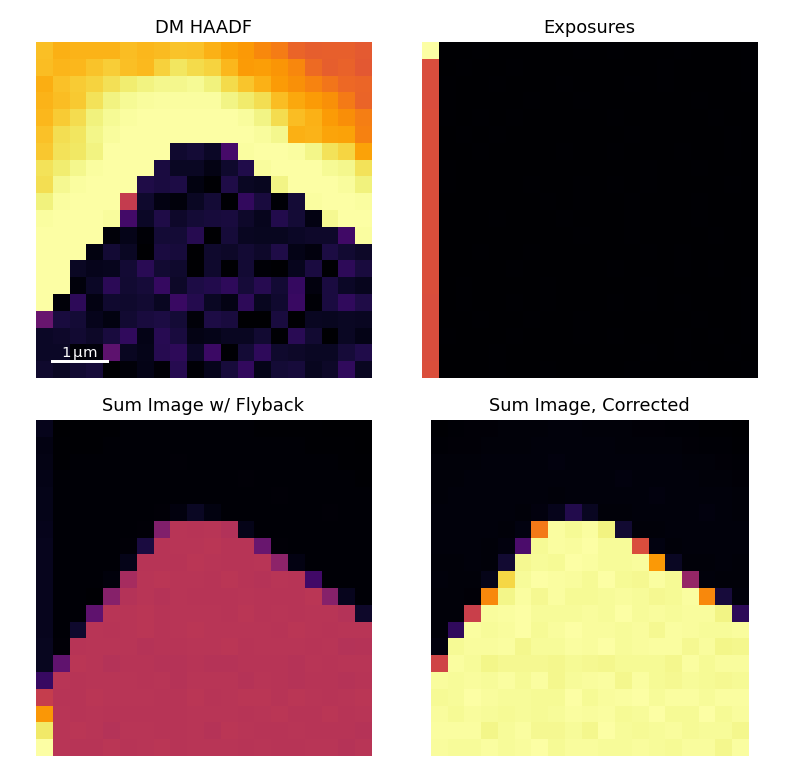

In [18]:
haadf = signals.DM0.as_signal2D((0,1))
exposure_image = signals.Exposure.as_signal2D((0,1))
sum_image = signals.fpd_sum_im.as_signal2D((0,1))
sum_image_crop = sum_image.isig[1:,:]

_ = hs.plot.plot_images([haadf, exposure_image, sum_image, sum_image_crop], cmap='inferno',
                    label=['DM HAADF', 'Exposures', 'Sum Image w/ Flyback', 'Sum Image, Corrected'],
                    scalebar = [0,], axes_decor='off', colorbar=None,
                    tight_layout=True, per_row=2)

### Correct Sum Image using Exposures
* Correct flyback pixels by dividing them by the ratio of the flyback pixel exposures to the exposures in the adjacent column

<IPython.core.display.Javascript object>


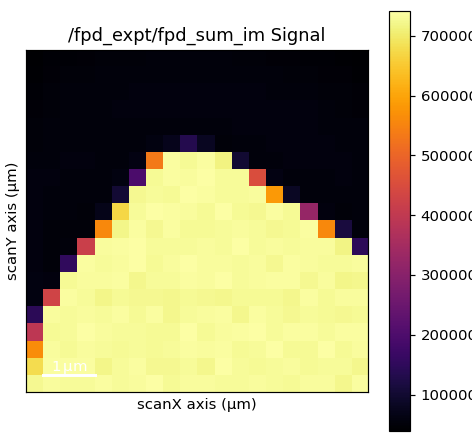

In [94]:
sum_image_corrected = sum_image.deepcopy()
sum_image_corrected.change_dtype(np.float32)
correction_image = np.ones(sum_image.data.shape, np.float32)
correction_image[:,0] = exposure_image.data[:,0]/exposure_image.data[:,1]
sum_image_corrected.data = sum_image_corrected.data / correction_image
sum_image_corrected.plot(cmap='inferno')

## Browse data with FPD DataBrowser class
* Interactive browsing of full dataset without reading into memory
* Slow using Matplotlib's notebook backend
* Faster to plot using QT outside of the notebook interface:
    * Call `%matplotlib qt` at beginning of imports cell
    * Drawback: images will not be embedded in the notebook

C:\Users\aherzing\Programs\Miniconda3\envs\pyxem\lib\site-packages\fpd\fpd_file.py:3174: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  self.nav_im = self.h5f['fpd_expt/fpd_sum_im/data'].value[...]


<IPython.core.display.Javascript object>


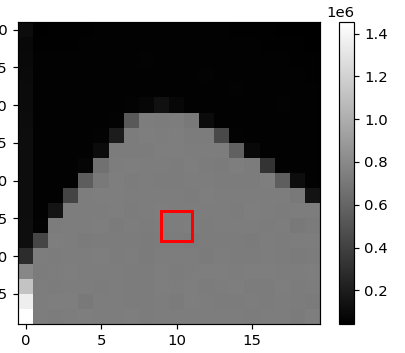

C:\Users\aherzing\Programs\Miniconda3\envs\pyxem\lib\site-packages\fpd\fpd_file.py:3210: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("inferno"))
  self.cmap.set_bad(self.cmap(0))


<IPython.core.display.Javascript object>


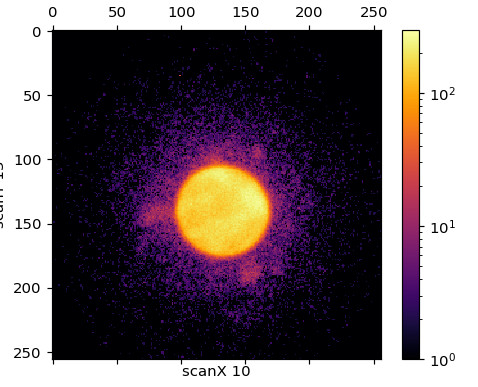

In [4]:
fpd.fpd_file.DataBrowser(h5filenames[0], cmap='inferno')